<a href="https://colab.research.google.com/github/Yakitoriholic/py_base_data_structure/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 数据结构基础

## 1.顺序表

In [ ]:

class SequentialList:
    def __init__(self):
        self.capacity = 10
        self.size = 0
        self.elements = [0] * self.capacity

    def __del__(self):

        del self.elements

    def size(self):

        return self.size

    def is_empty(self):

        return self.size == 0

    def insert(self, index, element):

        if index < 0 or index > self.size:
            raise ValueError("Invalid index")
        if self.size == self.capacity:
            self.resize()
        for i in range(self.size, index, -1):
            self.elements[i] = self.elements[i - 1]
        self.elements[index] = element
        self.size += 1

    def remove(self, index):

        if index < 0 or index >= self.size:
            raise ValueError("Invalid index")
        self.elements[index] = 0
        for i in range(index + 1, self.size):
            self.elements[i - 1] = self.elements[i]
        self.size -= 1

    def get(self, index):

        if index < 0 or index >= self.size:
            raise ValueError("Invalid index")
        return self.elements[index]

    def set(self, index, element):

        if index < 0 or index >= self.size:
            raise ValueError("Invalid index")
        self.elements[index] = element

    def find(self, element):

        for i in range(self.size):
            if self.elements[i] == element:
                return i
        return -1

    def resize(self):

        new_capacity = self.capacity * 2
        new_elements = [0] * new_capacity
        for i in range(self.size):
            new_elements[i] = self.elements[i]
        self.capacity = new_capacity
        self.elements = new_elements

    def __iter__(self):

        for i in range(self.size):
            yield self.elements[i]

    def __str__(self):

        return "Sequential List: " + str(self.elements[:self.size])


此外直接使用python中的列表

习题：

*   [值相等的最小索引](https://leetcode.cn/problems/smallest-index-with-equal-value/description/) ✔
*   [数组中两元素的最大乘积](https://leetcode.cn/problems/maximum-product-of-two-elements-in-an-array/description/)✔记得复习
*   [移除元素](https://leetcode.cn/problems/remove-element/description/)✔双指针


## 2.单向链表

[节点的插入](https://article-images.zsxq.com/Fpp_XSGo1wN5ieDfQn7YwxOT-Gj9)

[节点的删除](https://article-images.zsxq.com/FiWhweABsj6POxAQxsK7hMujSmmS)

[元素的查找](https://article-images.zsxq.com/FnT2SzXI0mSCEj4_BQgbvcFxT8iI)

[元素的索引](https://article-images.zsxq.com/FnT2SzXI0mSCEj4_BQgbvcFxT8iI)

[元素的修改](https://article-images.zsxq.com/FnT2SzXI0mSCEj4_BQgbvcFxT8iI)

In [ ]:
class ListNode:  #python中没有指针，先定义一个节点
    def __init__(self,x):
        self.val = x      #数据域
        self.next = None  #指针域

class LinkedList:
    def __init__(self):
        # 初始化链表，将链表头指针设为None，表示链表初始为空
        self.head = None
        # 初始化链表长度为0，用于记录链表中节点的个数
        self.len = 0

    def size(self):
        # 返回链表当前的长度，外部代码可以通过调用此方法获取链表节点数量
        return self.len

    def insert(self, pos, val):
        # 检查传入的插入位置pos是否有效
        # 如果pos小于0或者大于链表当前长度self.len，则抛出ValueError异常表示位置无效
        if pos < 0 or pos > self.len:
            raise ValueError("无效的位置")
        # 创建一个新的节点，其值为传入的val，这里假设ListNode是一个已经定义好的表示链表节点的类
        newNode = ListNode(val)
        if pos == 0:
            # 如果插入位置是0，也就是在链表头部插入节点
            # 先让新节点的next指针指向当前的头节点（self.head）
            newNode.next = self.head
            # 再更新链表的头指针self.head为新节点，使新节点成为链表的新头部
            self.head = newNode
        else:
       # 如果插入位置大于0，说明要在链表中间或者尾部插入节点。
        # 首先，我们需要找到要插入位置的前一个节点，用 prev 指针来指向它。
        # 先将 prev 指针初始化为链表的头节点 self.head，因为我们要从链表头开始遍历查找。
            prev = self.head
        # 通过以下循环，从链表头开始，让 prev 指针逐步向后移动，每次移动到下一个节点，
        # 循环次数为 pos - 1 次，这样就能保证循环结束后，prev 指针正好指向要插入位置的前一个节点。
        # 例如，要在位置 3 插入节点（pos = 3），那我们需要从链表头开始移动 2 次（pos - 1 = 2），
        # 使得 prev 指针停留在第 2 个节点处，该节点就是要插入位置（第 3 个位置）的前一个节点。
            for _ in range(pos - 1):
                prev = prev.next
        # 找到要插入位置的前一个节点（prev 所指向的节点）后，接下来要进行插入操作。
        # 先将新节点（newNode）的 next 指针指向 prev 节点的下一个节点（prev.next），
        # 这一步操作相当于把新节点“接入”到链表中，让它指向原来在插入位置上的那个节点，
        # 保证链表在插入新节点后节点之间的连接依然正确。
            newNode.next = prev.next
        # 然后，再将 prev 节点的 next 指针指向新节点，这样就完成了新节点在指定位置的插入。
        # 此时，prev 节点原本指向的下一个节点变成了新节点的后继节点，新节点成功插入到了链表中指定的位置。
            prev.next = newNode

        self.len += 1

    def delete(self, pos):
        if pos < 0 or pos >= self.len:
            raise ValueError("无效的位置")
        if pos == 0:
            self.head = self.head.next
        else:
            prev = self.head
            for _ in range(pos - 1):
                prev = prev.next
            prev.next = prev.next.next
        self.len -= 1

    def update(self, pos, val):
        if pos < 0 or pos >= self.len:
            raise ValueError("无效的位置")
        if pos == 0:
            self.head.val = val
        else:
            current = self.head
            for _ in range(pos):
                current = current.next
            current.val = val

    def search(self, val):
        current = self.head
        while current:
            if current.val == val:
                return current
            current = current.next
        return None

    def index(self, val):
        index = 0
        current = self.head
        while current:
            if current.val == val:
                return index
            index += 1
            current = current.next
        return -1

    def print(self):
        current = self.head
        while current:
            print(current.val, end='->')
            current = current.next
        print('None')

In [ ]:
class ListNode:
  def __init__(self,val):
    self.next = None
    self.val = val

class MyLinkedList:
  def __init__(self):
    self.len = 0
    self.head = None

  def insert(self,pos,val):#插入节点
    if pos<0 or pos >self.len:
      raise ValueError("Invalid Position!")
    newNode = ListNode(val)
    if pos == 0:
      newNode.next = self.head
      self.head = newNode
    else:
      prev = self.head
      for _ in range(pos - 1):
          prev = prev.next
      newNode.next = prev.next
      prev.next = newNode
    self.len += 1

  def delete(self,pos):#对于链表，要访问当前节点，最好遍历到之前的节点
    if self.len == 0:
      raise ValueError("List is empty")
    if pos<0 or pos >self.len:
      raise ValueError("Invalid Position!")
    if pos == 0:
      self.head = self.head.next
    else:
      prev = self.head
      for _ in range(pos -1):
        prev = prev.next
      prev.next = prev.next.next

    self.len -= 1
  def update(self,pos,val):#更新节点的值
      if pos<0 or pos >self.len:
        raise ValueError("Invalid Position!")
      if self.len == 0:
        raise ValueError("List is empty")
      current = self.head
      for _ in range(pos):
        current = current.next
      current.val = val
  # def update(self,pos,val):
  #   if pos<0 or pos >self.len:
  #     raise ValueError("Invalid Position!")
  #   if self.len == 0:
  #     raise ValueError("List is empty")
  #   newNode = ListNode(val)
  #   if pos == 0:
  #     self.head.next = newNode.next
  #     self.head = newNode
  #   else:
  #     prev = self.head
  #     for _ in range(self.len):
  #       prev = prev.next
  #     prev.next.next = newNode.next
  #     prev.next = newNode
  def search(self,val):
      current = self.head
      while current:#如果current非空
        if current.val == val:
          return current
        current = current.next#一直遍历下去
      return None
  def index(self,val):
      idx = 0
      current = self.head
      while current:
        if current.val == val:
          return  idx
        else:
          idx += 1
          current = current.next
      return -1
  def print(self):
      current = self.head
      while current:
        print(current.val,end ='->')
        current = current.next
      print('None')

In [ ]:
l=MyLinkedList()
l.insert(0,2)
l.insert(1,1)
l.insert(2,4)
l.print()

2->1->4->None


In [ ]:
l.index(1),l.index(2)
l.insert(1,45)
l.print()

2->45->1->4->None


[返回倒数第k个节点](https://leetcode.cn/problems/kth-node-from-end-of-list-lcci/description/)✔

[删除排序链表中的重复元素](https://leetcode.cn/problems/remove-duplicates-from-sorted-list/)×复习

[移除重复节点](https://leetcode.cn/problems/remove-duplicate-node-lcci/description/)

## 3.栈

[入栈图解](https://article-images.zsxq.com/Fjbe5Nt2AoMC1016p6k0CLf3Ubhy)

[出栈图解](https://article-images.zsxq.com/Fi2AEjNGzWmiaiiq_wjLFqtsQYKl)

栈通常用于实现函数调用、递归、表达式求值等操作

顺序表实现

In [ ]:
class Stack:
    def __init__(self):
        self.data = []
    def push(self,val):             #入栈
        self.data.append(val)
    def pop(self):                  #出栈
        if self.empty():
            return "Stack is empty"
        return self.data.pop()
    def top(self):                  #获取栈顶
        if self.empty():
            return "Stack is empty"
        return self.data[-1]
    def size(self):                  #栈大小
        return len(self.data)
    def empty(self):                #栈是否空
        return len(self.data) == 0

In [ ]:
stk = Stack()
stk.push(1)
stk.push(2)
stk.push(6)
stk.push(5)

In [ ]:
print(stk.top())

In [ ]:
while not stk.empty():
    stk.pop()
stk.empty()

In [ ]:
class MyStack:
    def __init__(self):
        self.data = []
    def push(self,val):
        self.data.append(val)
    def pop(self):
        if self.empty():
            return "stack is empty"
        return self.data.pop()
    def top(self):
        if self.empty():
            return "stack is empty"
        return self.data[-1]
    def size(self):
        return len(self.data)
    def empty(self):
        return len(self.data) == 0

实际上，列表就可以当作栈来使用

入栈:`append`

栈顶：`data[-1]`

出栈:`pop()`

[图书整理](https://leetcode.cn/problems/cong-wei-dao-tou-da-yin-lian-biao-lcof/description/)

[回文链表](https://leetcode.cn/problems/aMhZSa/description/)

[括号的最大嵌套深度](https://leetcode.cn/problems/maximum-nesting-depth-of-the-parentheses/description/)

## 4.队列

[入队](https://article-images.zsxq.com/Fh7NPl-QlvFnybLJ7ue5kLxK4vj-)

[出队](https://article-images.zsxq.com/Fl6ZPy9UNzXQRedoRdQfJD5eksGb)

[获取队首](https://article-images.zsxq.com/FuaHin96puVBMlbrGSMMG1KUajkE)

In [ ]:
class Queue:
    def __init__(self):
        self.data = []
        self.head = 0        #头指针为0
        self.tail = 0        #尾指针为0
    def push(self,val):
        self.data.append(val)
        self.tail += 1
    def pop(self):            #删除
        if self.empty():
            raise "Queue is empty"
        val = self.data[self.head]
        self.head += 1
        return val  ###################

    def front(self):
        if self.empty():
            raise "Queue is empty"
        val = self.data[self.head]
        return val

    def size(self):
        return self.tail - self.head

    def empty(self):
        return self.head == self.tail

    def print(self):
        for i in range(self.size()):
            print(self.data[self.head+i],end ='-')
        print('None')


In [ ]:
q = Queue()
q.push(1)
q.push(2)
q.push(3)

In [ ]:
q.print(),q.size()

1-2-3-None


(None, 3)

In [ ]:
while not q.empty():
    print(q.front())
    q.pop()

1
2
3


In [ ]:
q.empty()

False

In [ ]:
q.push(5)
print(q.front())

5


In [ ]:
q.size()

3

[最近的请求次数](https://leetcode.cn/problems/number-of-recent-calls/description/)

[数据流中的移动平均值](https://leetcode.cn/problems/qIsx9U/description/)

## 5.栈&队列

### 5.1用队列实现栈


[力扣题目](https://leetcode.cn/problems/implement-stack-using-queues/submissions/586560120/)

底层数据结构为队列,要满足这个需求,必须要用到两个队列,一个是**主队列q1**,一个是**辅助队列q2**

***注意:辅助队列每次操作完毕一定会变成空的***

入栈操作:将元素在q1中入队

出栈操作:

1.如果q1没有元素,那么这个操作非法

2.判断q1的元素个数是否大于1,如果大于1,则将q1的元素全部按照顺序在q2入队

3.获取q1的队首元素,保存起来用于最后返回;并将q1执行出队操作;

4.将q2的元素全部按照顺序在q1入队

5.返回第三部中保存起来的q1队首元素

获取栈顶元素:

1.如果q1没有元素,那么这个操作非法

2.判断q1的元素个数是否大于1,如果大于1,则将q1的元素全部按照顺序在q2入队

3.获取q1的队首元素,保存起来用于最后返回;并将q1执行出队操作;**并且将这个元素在q2入对**

栈是否为空:

q1如果空,则栈空

4.将q2的元素全部按照顺序在q1入队

5.返回第三部中保存起来的q1队首元素

In [ ]:
'''实现队列'''
class Queue:
    def __init__(self):
        self.data = []
        self.head = 0        #头指针为0
        self.tail = 0        #尾指针为0
    def push(self,val):
        self.data.append(val)
        self.tail += 1
    def pop(self):            #删除
        if self.empty():
            raise "Queue is empty"
        val = self.data[self.head]
        self.head += 1
        return val  ###################

    def front(self):
        if self.empty():
            raise "Queue is empty"
        val = self.data[self.head]
        return val

    def size(self):
        return self.tail - self.head

    def empty(self):
        return self.head == self.tail


class MyStack:
    def __init__(self):
        self.q1 = Queue()
        self.q2 = Queue()
    def push(self,val) -> None:
        self.q1.push(val)

    def pop(self):
        '''实际上就是将一个容器作为暂存容器'''

        #当大于1时,将q1的元素pop进q2中
        while self.q1.size() >1:
            self.q2.push(self.q1.pop())
        #将q1剩下的一个元素放进res
        res = self.q1.pop()
        #将q2中的元素再放进q1
        while self.q2.size > 0:
            self.q1.push(self.q2.pop())

        return res

    def top(self):
        '''实际上就是将一个容器作为暂存容器'''

        #当大于1时,将q1的元素pop进q2中
        while self.q1.size() >1:
            self.q2.push(self.q1.pop())
        #将q1剩下的一个元素放进res,(先检查,再转移)
        res = self.q1.pop()
        #再放进q2
        self.q2.push(res)
        #将q2中的元素再放进q1
        while self.q2.size > 0:
            self.q1.push(self.q2.pop())

        return res

    def empty(self) -> bool:
        return self.q1.empty() #看q1是否为空

### 5.2用栈实现队列

[力扣题目](https://leetcode.cn/problems/implement-queue-using-stacks/description/)

In [ ]:
class Stack:
    def __init__(self):
        self.data = []
    def push(self,val):             #入栈
        self.data.append(val)
    def pop(self):                  #出栈
        if self.empty():
            return "Stack is empty"
        return self.data.pop()
    def top(self):                  #获取栈顶
        if self.empty():
            return "Stack is empty"
        return self.data[-1]
    def size(self):                  #栈大小
        return len(self.data)
    def empty(self):                #栈是否空
        return len(self.data) == 0

class Queue:
    def __init__(self):
        self.s1 = Stack()
        self.s2 = Stack()
    def push(self,val):
        self.s1.push(val)
    def pop(self):
        '''
        if not self.s2.empty():  #此方法不适用，会提前返回return "stack is empty"
            self.s2.pop()
        else:
            while not self.s1.empty():
                self.s2.push(self.s1.pop())
        return self.s2.pop()
        '''
        if self.s2.empty():
            while not self.s1.empty():
                self.s2.push(self.s1.pop())
        return self.s2.pop()
    def front(self):
        if self.s2.empty():
            while not self.s1.empty():
                self.s2.push(self.s1.pop())
        return self.s2.top()
    def empty(self):
        return self.s1.empty() and self.s2.empty()


In [ ]:
q = Queue()
q.push(1)
print(q.front())
q.pop()

1


1

In [ ]:
q.push(2)
print(q.front())

2


In [ ]:
q.push(3)
q.empty()

False

In [ ]:
q.push(4)
print(q.front())

2


## 6.字符串

In [ ]:
# 创建
s = ''

In [ ]:
# 拼接
s = s + 'hello'
print(s)
s += ' world'
print(s)

In [ ]:
# 获取长度
print(len(s))

In [ ]:
# 查
idx = s.find('world')
print(idx)

idx = s.find('World')
print(idx)

In [ ]:
# 索引
print(s[3])

In [ ]:
# 切片
print(s[3:5])
print(s[:5])
print(s[3:])
print(s[:])
print(s[:-1])

In [ ]:
# 拷贝
t = "x"
s = t
print(s)

[反转字符串](https://leetcode.cn/problems/reverse-string/description/)

[字符串中的单词数](https://leetcode.cn/problems/number-of-segments-in-a-string/description/)

[判断字符串的两半是否相似](https://leetcode.cn/problems/determine-if-string-halves-are-alike/)

## 7.树

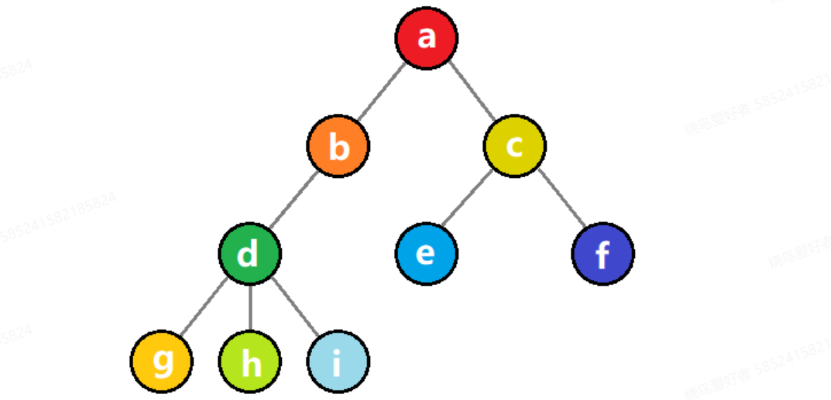

In [36]:
#自己再写一遍
class TreeNode:            #节点有两个属性，数据，子节点
    def __init__(self):     #一个功能：增加子节点
        self.data = None
        self.childrenList = []
    def addChild(self,Node):
        self.childrenList.append(Node)

class Tree:
    def __init__(self,maxNode):
        self.root = None
        self.nodes = [TreeNode() for i in range(maxNode)]
    def getTreeNode(self,id):
        return self.nodes[id]
    def setRoot(self,id):
        self.root = self.getTreeNode(id)
    def addTreeNode(self,pid,sid):
        pNode = self.getTreeNode(pid)
        sNode = self.getTreeNode(sid)
        pNode.addChild(sNode)
    def assginData(self,id,data):
        self.getTreeNode(id).data = data

    def Print(self,node = None):
        if node == None:
            node = self.root
        print(node.data,end = ' ')
        for child in node.childrenList:
            self.Print(child)

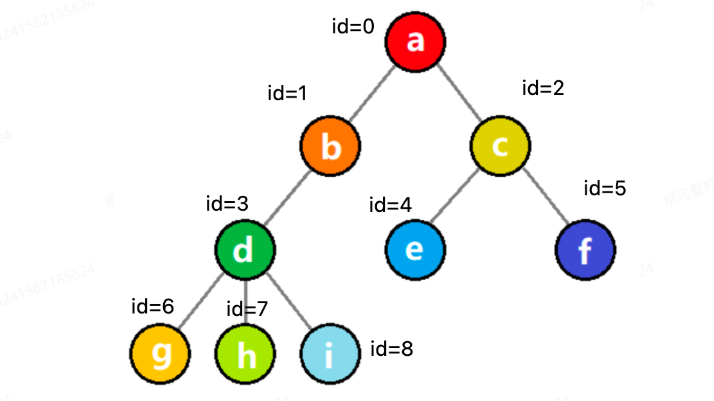

In [37]:
t = Tree(9)
t.setRoot(0)
#assignData
t.assginData(0,'a')
t.assginData(1,'b')
t.assginData(2,'c')
t.assginData(3,'d')
t.assginData(4,'e')
t.assginData(5,'f')
t.assginData(6,'g')
t.assginData(7,'h')
t.assginData(8,'i')

#setalign
t.addTreeNode(0,1)
t.addTreeNode(0,2)
t.addTreeNode(1,3)
t.addTreeNode(2,4)
t.addTreeNode(2,5)
t.addTreeNode(3,6)
t.addTreeNode(3,7)
t.addTreeNode(3,8)

t.Print()

a b d g h i c e f 

[2236. 判断根结点是否等于子结点之和](https://leetcode.cn/problems/root-equals-sum-of-children/description/)

[104. 二叉树的最大深度](https://leetcode.cn/problems/maximum-depth-of-binary-tree/description/)

[LCR 175. 计算二叉树的深度](https://leetcode.cn/problems/er-cha-shu-de-shen-du-lcof/description/)